In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# minor ticks
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from natsort import natsorted

In [2]:
variables = ['pr', 'psl', 'sftlf', 'tas', 'tasmin', 'tasmax']

def plot(df):
    axes = sns.heatmap(df.sort_index(), square=True, cbar=False, yticklabels=True)

    # Grid
    locator = MultipleLocator(1)
    locator.MAXTICKS = 2000
    axes.xaxis.set_minor_locator(locator)
    axes.yaxis.set_minor_locator(locator)
    plt.grid(b=True, axis='x', which='minor', color='#666666', linestyle='-')
    plt.grid(b=True, axis='y', which='minor', color='#666666', linestyle='-')

    # Labels
    axes.tick_params('x', top=True, labeltop=True, labelrotation=60)

def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f%s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

## Load and merge data

In [3]:
day = pd.read_csv("CMIP6.csv", index_col="dataset_id", dtype={'pr': np.int32, 'psl': np.int32, 'sftlf': np.int32, 'tas': np.int32, 'tasmin': np.int32, 'tasmax': np.int32})
mon = pd.read_csv("CMIP6Amon.csv", index_col="dataset_id", dtype={'pr': np.int32, 'psl': np.int32, 'sftlf': np.int32, 'tas': np.int32, 'tasmin': np.int32, 'tasmax': np.int32})

In [4]:
mi = pd.MultiIndex.from_product([['day', 'mon'], ['size']+variables], names=['freq', 'var'])
merged = day.merge(mon, on="dataset_id", how="outer").fillna(0)
merged.columns = mi

In [5]:
merged['total_size'] = merged.loc[:, (slice(None),'size')].sum(axis=1)

In [6]:
merged.head()

freq                                                         day               \
var                                                         size pr psl sftlf   
dataset_id                                                                      
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    83281021756  1   1     1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...  127760731048  0   1     1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...  126845522466  0   1     1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...  127758551709  0   1     1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...  127743680862  0   1     1   

freq                                                                  \
var                                                tas tasmin tasmax   
dataset_id                                                             
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    1      1      1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...   1      1      0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...   1      1      0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...   1      1      0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...   1      1      0   

freq                                                       mon               \
var                                                       size pr psl sftlf   
dataset_id                                                                    
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn   2410742532  1   1     1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...  4895633491  0   1     1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...  3982220427  0   1     1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...  4895902467  0   1     1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...  4895614716  0   1     1   

freq                                                                  \
var                                                tas tasmin tasmax   
dataset_id                                                             
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    0      0      1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...   1      1      0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...   1      1      0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...   1      1      0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...   1      1      0   

freq                                                  total_size  
var                                                               
dataset_id                                                        
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    85691764288  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...  132656364539  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...  130827742893  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...  132654454176  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...  132639295578

Number of datasets:

In [7]:
n=len(merged)
size_mon=sizeof_fmt(merged.loc[:, ('mon','size')].sum())
size_day=sizeof_fmt(merged.loc[:, ('day','size')].sum())
size_total=sizeof_fmt(merged['total_size'].sum())

print(f'Number of datasets: {n}')
print(f'Size (monthly): {size_mon}')
print(f'Size (daily): {size_day}')
print(f'Size (total): {size_total}')

Number of datasets: 1087
Size (monthly): 1.4TiB
Size (daily): 31.0TiB
Size (total): 32.4TiB


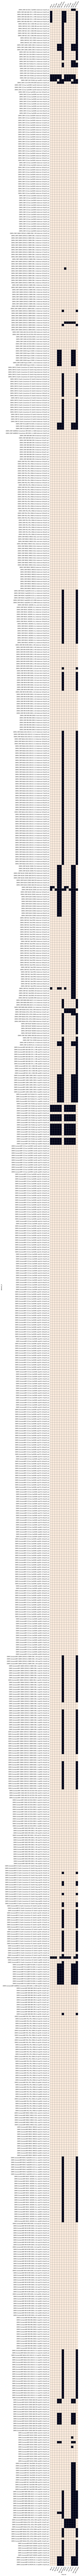

In [8]:
fig, ax = plt.subplots()
plot(merged.loc[:, (['day', 'mon'], variables)])
fig.set_size_inches(7, 400, forward=True)
plt.show()

## Filter runs

Get the run with most variables. For runs with the same number of variables, select the lowest run based on natural order (eg. **r1i1p1f1** < r1i1p1f2 < r1i1p3f1 < r2i1p1f1)

In [9]:
merged['group'] = merged.index.str.replace('\.r[0-9]+i[0-9]+p[0-9]+f[0-9]+', '')
members = merged.index.str.extract('(r[0-9]+i[0-9]+p[0-9]+f[0-9]+)', expand=False)
merged['member_id'] = pd.Categorical(members, ordered=True, categories=natsorted(members.unique()))
merged['variables'] = merged.loc[:, (['day', 'mon'], variables)].sum(axis=1)

max_vars = (merged.sort_values(['group', 'variables', 'member_id'], ascending=[True, False, True])
                  .reset_index(level=0)
                  .groupby('group')
                  .first()
                  .set_index('dataset_id'))

/home/zequi/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [10]:
max_vars.head()

freq                                                         day               \
var                                                         size pr psl sftlf   
dataset_id                                                                      
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    83281021756  1   1     1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...  127760731048  0   1     1   
CMIP6.CMIP.BCC.BCC-CSM2-MR.esm-hist.r1i1p1f1.gn     254825658208  1   1     1   
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn   306196368776  1   1     1   
CMIP6.CMIP.BCC.BCC-ESM1.historical.r1i1p1f1.gn       49021684516  1   1     1   

freq                                                                  \
var                                                tas tasmin tasmax   
dataset_id                                                             
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    1      1      1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...   1      1      0   
CMIP6.CMIP.BCC.BCC-CSM2-MR.esm-hist.r1i1p1f1.gn      1      1      0   
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn    1      1      0   
CMIP6.CMIP.BCC.BCC-ESM1.historical.r1i1p1f1.gn       1      1      0   

freq                                                        mon               \
var                                                        size pr psl sftlf   
dataset_id                                                                     
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    2410742532  1   1     1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...   4895633491  0   1     1   
CMIP6.CMIP.BCC.BCC-CSM2-MR.esm-hist.r1i1p1f1.gn      8111545600  1   1     1   
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn   10139432000  1   1     1   
CMIP6.CMIP.BCC.BCC-ESM1.historical.r1i1p1f1.gn       1623675340  1   1     1   

freq                                                                  \
var                                                tas tasmin tasmax   
dataset_id                                                             
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    0      0      1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...   1      1      0   
CMIP6.CMIP.BCC.BCC-CSM2-MR.esm-hist.r1i1p1f1.gn      1      1      0   
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn    1      1      0   
CMIP6.CMIP.BCC.BCC-ESM1.historical.r1i1p1f1.gn       1      1      0   

freq                                                  total_size member_id  \
var                                                                          
dataset_id                                                                   
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    85691764288  r1i1p1f1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...  132656364539  r1i1p1f1   
CMIP6.CMIP.BCC.BCC-CSM2-MR.esm-hist.r1i1p1f1.gn     262937203808  r1i1p1f1   
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn   316335800776  r1i1p1f1   
CMIP6.CMIP.BCC.BCC-ESM1.historical.r1i1p1f1.gn       50645359856  r1i1p1f1   

freq                                               variables  
var                                                           
dataset_id                                                    
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn         10  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...         8  
CMIP6.CMIP.BCC.BCC-CSM2-MR.esm-hist.r1i1p1f1.gn           10  
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn         10  
CMIP6.CMIP.BCC.BCC-ESM1.historical.r1i1p1f1.gn            10

In [11]:
print(f'Number of datasets: {len(max_vars)}')

Number of datasets: 211


In [12]:
n=len(max_vars)
size_mon=sizeof_fmt(max_vars.loc[:, ('mon','size')].sum())
size_day=sizeof_fmt(max_vars.loc[:, ('day','size')].sum())
size_total=sizeof_fmt(max_vars['total_size'].sum())

print(f'Number of datasets: {n}')
print(f'Size (monthly): {size_mon}')
print(f'Size (daily): {size_day}')
print(f'Size (total): {size_total}')

Number of datasets: 211
Size (monthly): 369.7GiB
Size (daily): 9.0TiB
Size (total): 9.3TiB


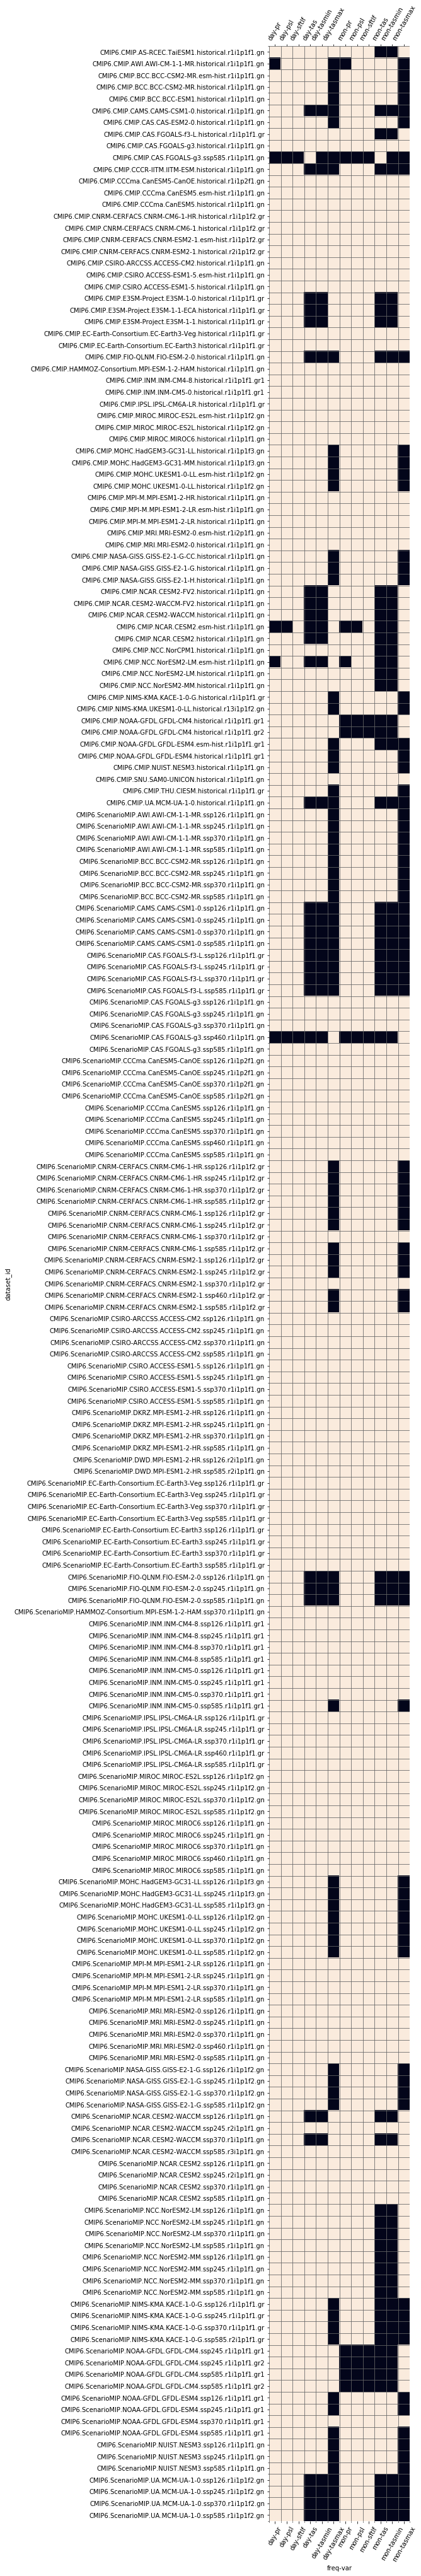

In [13]:
fig, ax = plt.subplots()
#plot(max_vars[['day', 'mon']])
plot(max_vars.loc[:, (['day', 'mon'], variables)])
fig.set_size_inches(4, 400, forward=True)
plt.show()